# Absenteeism Model (Preprocessing)

This task uses machine learning approaches to predict the probability of absence of employee given a dataset containing relevant information about the absence of employees from a firm over a period of 3 years from 2015 to 2018. Each record in the dataset contains information about the employee; their reasons, duration and date of absence as well as other relevant factors that may affect their ability to attend work, such as transportation expence, age, daily work load, BMI, etc.  

In [1]:
import pandas as pd

In [2]:
raw_data = pd.read_csv('Absenteeism_data.csv')

In [3]:
raw_data

ID  Reason for Absence        Date  Transportation Expense  \
0    11                  26  07/07/2015                     289   
1    36                   0  14/07/2015                     118   
2     3                  23  15/07/2015                     179   
3     7                   7  16/07/2015                     279   
4    11                  23  23/07/2015                     289   
..   ..                 ...         ...                     ...   
695  17                  10  23/05/2018                     179   
696  28                   6  23/05/2018                     225   
697  18                  10  24/05/2018                     330   
698  25                  23  24/05/2018                     235   
699  15                  28  31/05/2018                     291   

     Distance to Work  Age  Daily Work Load Average  Body Mass Index  \
0                  36   33                  239.554               30   
1                  13   50                  239.554               31   
2                  51   38                  239.554               31   
3                   5   39                  239.554               24   
4                  36   33                  239.554               30   
..                ...  ...                      ...              ...   
695                22   40                  237.656               22   
696                26   28                  237.656               24   
697                16   28                  237.656               25   
698                16   32                  237.656               25   
699                31   40                  237.656               25   

     Education  Children  Pets  Absenteeism Time in Hours  
0            1         2     1                          4  
1            1         1     0                          0  
2            1         0     0                          2  
3            1         2     0                          4  
4            1         2     1                          2  
..         ...       ...   ...                        ...  
695          2         2     0                          8  
696          1         1     2                          3  
697          2         0     0                          8  
698          3         0     0                          2  
699          1         1     1                          2  

[700 rows x 12 columns]

In [4]:
df = raw_data.copy()

In [5]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None
display(df) # We verify that there are no missing rows or columns in the dataframe

ID  Reason for Absence        Date  Transportation Expense  \
0    11                  26  07/07/2015                     289   
1    36                   0  14/07/2015                     118   
2     3                  23  15/07/2015                     179   
3     7                   7  16/07/2015                     279   
4    11                  23  23/07/2015                     289   
5     3                  23  10/07/2015                     179   
6    10                  22  17/07/2015                     361   
7    20                  23  24/07/2015                     260   
8    14                  19  06/07/2015                     155   
9     1                  22  13/07/2015                     235   
10   20                   1  20/07/2015                     260   
11   20                   1  14/07/2015                     260   
12   20                  11  15/07/2015                     260   
13    3                  11  15/07/2015                     179   
14    3                  23  15/07/2015                     179   
15   24                  14  17/07/2015                     246   
16    3                  23  17/07/2015                     179   
17    3                  21  27/07/2015                     179   
18    6                  11  30/07/2015                     189   
19   33                  23  05/08/2015                     248   
20   18                  10  12/08/2015                     330   
21    3                  11  03/08/2015                     179   
22   10                  13  10/08/2015                     361   
23   20                  28  14/08/2015                     260   
24   11                  18  17/08/2015                     289   
25   10                  25  24/08/2015                     361   
26   11                  23  04/08/2015                     289   
27   30                  28  12/08/2015                     157   
28   11                  18  19/08/2015                     289   
29    3                  23  28/08/2015                     179   
30    3                  18  17/08/2015                     179   
31    2                  18  27/08/2015                     235   
32    1                  23  27/08/2015                     235   
33    2                  18  17/08/2015                     235   
34    3                  23  17/08/2015                     179   
35   10                  23  17/08/2015                     361   
36   11                  24  04/08/2015                     289   
37   19                  11  20/08/2015                     291   
38    2                  28  21/08/2015                     235   
39   20                  23  28/08/2015                     260   
40   27                  23  01/09/2015                     184   
41   34                  23  07/09/2015                     118   
42    3                  23  01/09/2015                     179   
43    5                  19  08/09/2015                     235   
44   14                  23  09/09/2015                     155   
45   34                  23  13/09/2015                     118   
46    3                  23  14/09/2015                     179   
47   15                  23  24/09/2015                     291   
48   20                  22  04/09/2015                     260   
49   15                  14  14/09/2015                     291   
50   20                   0  21/09/2015                     260   
51   29                   0  28/09/2015                     225   
52   28                  23  08/09/2015                     225   
53   34                  23  15/09/2015                     118   
54   11                   0  22/09/2015                     289   
55   36                   0  29/09/2015                     118   
56   28                  18  16/09/2015                     225   
57    3                  23  23/09/2015                     179   
58   13                   0  30/09/2015             

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


In [7]:
# Drop the ID column
# Reasoning: ID is a nominal variable containing no numerical data and will have a negative effect on the accuracy of our model
df = df.drop(['ID'], axis = 1)

In [8]:
# Analyze the 'Reason for Absence' column as it most directly helps us answer the business question
# Extract (sorted) array of unique values for the Reason of Absence column to check for missing values 
sorted(df['Reason for Absence'].unique()) 

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

In [9]:
len(df['Reason for Absence'].unique()) # One number between 0 and 28 is missing, i.e. 20

28

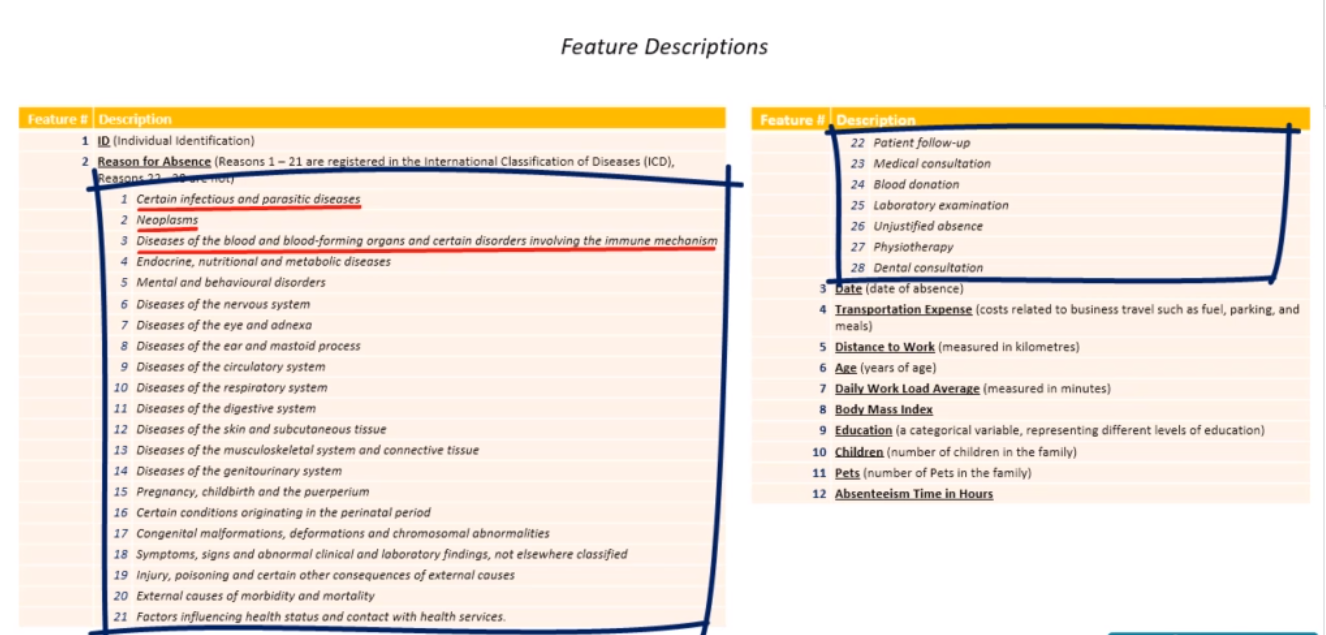

This image contains feature descriptions which clarify what exactly the numerical value in the 'Reason for Absence' column denotes. 'Reason for absence' is a nominal categorical value. It is represented by numbers rather than string data in order to save space in a database. Each employee has only reason for absence.

In [10]:
# Obtaining dummies for a feature

reason_columns = pd.get_dummies(df['Reason for Absence'])

In [11]:
reason_columns

0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3     0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   
4     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
5     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
6     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
7     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
8     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
9     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
10    0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
11    0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
12    0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
13    0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
14    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
15    0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   
16    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
17    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
18    0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
19    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
20    0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   
21    0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
22    0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   
23    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
24    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
25    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
26    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
27    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
28    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
29    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
30    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
31    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
32    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
33    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
34    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
35    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
36    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
37    0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
38    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
39    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
40    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
41    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
42    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
43    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
44    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
45    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
46    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
47    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
48    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
49    0   0   0   0   0   0   0   0   0   0   0   0   0

In [12]:
# Check for missing values by adding boolean column 'check'

reason_columns['check'] = reason_columns.sum(axis=1)
reason_columns # A value of 0 indicates missing values. There are none in this dummy dataframe.

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  21  \
0    0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
1    1  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
2    0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
3    0  0  0  0  0  0  0  1  0  0   0   0   0   0   0   0   0   0   0   0   0   
4    0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
5    0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
6    0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
7    0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
8    0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   1   0   
9    0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
10   0  1  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
11   0  1  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
12   0  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   0   0   0   0   0   
13   0  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   0   0   0   0   0   
14   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
15   0  0  0  0  0  0  0  0  0  0   0   0   0   0   1   0   0   0   0   0   0   
16   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
17   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   1   
18   0  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   0   0   0   0   0   
19   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
20   0  0  0  0  0  0  0  0  0  0   1   0   0   0   0   0   0   0   0   0   0   
21   0  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   0   0   0   0   0   
22   0  0  0  0  0  0  0  0  0  0   0   0   0   1   0   0   0   0   0   0   0   
23   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
24   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   1   0   0   
25   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
26   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
27   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
28   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   1   0   0   
29   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
30   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   1   0   0   
31   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   1   0   0   
32   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
33   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   1   0   0   
34   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
35   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
36   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
37   0  0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   0   0   0   0   0   
38   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
39   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
40   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
41   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
42   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
43   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   1   0   
44   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
45   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
46   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
47   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
48   0  0  0  0  0  0  0  0  0  0   

In [13]:
reason_columns['check'].unique() # To ensure no other values than 1 occur in the column

array([1], dtype=int64)

In [15]:
reason_columns = reason_columns.drop(['check'], axis=1) # Drop 'check', it's purpose is complete
reason_columns

0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3     0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   
4     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
5     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
6     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
7     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
8     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
9     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
10    0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
11    0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
12    0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
13    0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
14    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
15    0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   
16    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
17    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
18    0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
19    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
20    0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   
21    0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
22    0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   
23    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
24    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
25    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
26    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
27    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
28    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
29    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
30    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
31    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
32    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
33    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
34    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
35    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
36    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
37    0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
38    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
39    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
40    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
41    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
42    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
43    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
44    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
45    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
46    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
47    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
48    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
49    0   0   0   0   0   0   0   0   0   0   0   0   0

In [16]:
# Drop the Reason 0 column to avoid multicollinearity issues

reason_columns = pd.get_dummies(df['Reason for Absence'], drop_first = True)
reason_columns

1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  \
0     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3     0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   
4     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
5     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
6     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
7     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
8     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
9     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
10    1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
11    1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
12    0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   
13    0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   
14    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
15    0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   
16    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
17    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
18    0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   
19    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
20    0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   
21    0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   
22    0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   
23    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
24    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   
25    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
26    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
27    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
28    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   
29    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
30    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   
31    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   
32    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
33    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   
34    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
35    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
36    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
37    0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   
38    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
39    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
40    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
41    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
42    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
43    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
44    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
45    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
46    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
47    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
48    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
49    0   0   0   0   0   0   0   0   0   0   0   0   0

#### Grouping Reason for Absence 

We group similar reasons of absense together in order to reduce the number of variables and make analysis easier.

In [18]:
df = df.drop(['Reason for Absence'], axis=1) # Drop column to prevent multicollinearity 
df # Mulitcollinearity occurs because the Reason for Absence column on df conveys same info as reason_columns on dummy df

Date  Transportation Expense  Distance to Work  Age  \
0    07/07/2015                     289                36   33   
1    14/07/2015                     118                13   50   
2    15/07/2015                     179                51   38   
3    16/07/2015                     279                 5   39   
4    23/07/2015                     289                36   33   
5    10/07/2015                     179                51   38   
6    17/07/2015                     361                52   28   
7    24/07/2015                     260                50   36   
8    06/07/2015                     155                12   34   
9    13/07/2015                     235                11   37   
10   20/07/2015                     260                50   36   
11   14/07/2015                     260                50   36   
12   15/07/2015                     260                50   36   
13   15/07/2015                     179                51   38   
14   15/07/2015                     179                51   38   
15   17/07/2015                     246                25   41   
16   17/07/2015                     179                51   38   
17   27/07/2015                     179                51   38   
18   30/07/2015                     189                29   33   
19   05/08/2015                     248                25   47   
20   12/08/2015                     330                16   28   
21   03/08/2015                     179                51   38   
22   10/08/2015                     361                52   28   
23   14/08/2015                     260                50   36   
24   17/08/2015                     289                36   33   
25   24/08/2015                     361                52   28   
26   04/08/2015                     289                36   33   
27   12/08/2015                     157                27   29   
28   19/08/2015                     289                36   33   
29   28/08/2015                     179                51   38   
30   17/08/2015                     179                51   38   
31   27/08/2015                     235                29   48   
32   27/08/2015                     235                11   37   
33   17/08/2015                     235                29   48   
34   17/08/2015                     179                51   38   
35   17/08/2015                     361                52   28   
36   04/08/2015                     289                36   33   
37   20/08/2015                     291                50   32   
38   21/08/2015                     235                29   48   
39   28/08/2015                     260                50   36   
40   01/09/2015                     184                42   27   
41   07/09/2015                     118                10   37   
42   01/09/2015                     179                51   38   
43   08/09/2015                     235                20   43   
44   09/09/2015                     155                12   34   
45   13/09/2015                     118                10   37   
46   14/09/2015                     179                51   38   
47   24/09/2015                     291                31   40   
48   04/09/2015                     260                50   36   
49   14/09/2015                     291                31   40   
50   21/09/2015                     260                50   36   
51   28/09/2015                     225                26   28   
52   08/09/2015                     225                26   28   
53   15/09/2015                     118                10   37   
54   22/09/2015                     289                36   33   
55   29/09/2015                     118                13   50   
56   16/09/2015                     225                26   28   
57   23/09/2015                     179                51   38   
58   30/09/2015                     369                17   31   
59   11/09/2015                     248            

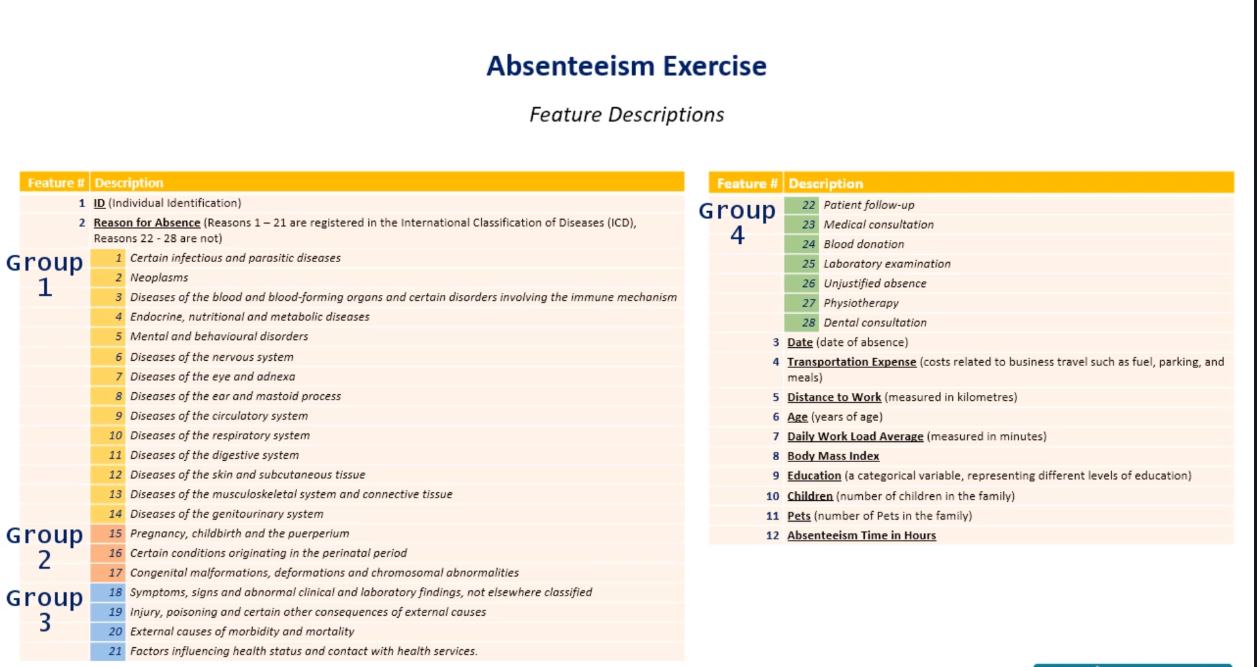

Classification of variables for qualitative analysis (best approach to given data). Group 1 (reasons 1-14) represents absence due to disease. Group 2 (reasons 15-17) is comprised of pregnancy related reasons. Group 3 (reasons 18-21) represents absence due to poisoning and other miscellaneous reasons not classified elsewhere. Finally, group 4 (reasons 21-28) represents absence due to primarily health-related commitments and appointments, as well as unjustified absence and blood donation.   

In [19]:
# Group the variables

reason_type_1 = reason_columns.loc[:, 1:14].max(axis=1)
reason_type_2 = reason_columns.loc[:, 15:17].max(axis=1)
reason_type_3 = reason_columns.loc[:, 18:21].max(axis=1)
reason_type_4 = reason_columns.loc[:, 22:].max(axis=1)

In [20]:
# Add reason_type data to df

df = pd.concat([df, reason_type_1, reason_type_2, reason_type_3, reason_type_4], axis=1)
df

Date  Transportation Expense  Distance to Work  Age  \
0    07/07/2015                     289                36   33   
1    14/07/2015                     118                13   50   
2    15/07/2015                     179                51   38   
3    16/07/2015                     279                 5   39   
4    23/07/2015                     289                36   33   
5    10/07/2015                     179                51   38   
6    17/07/2015                     361                52   28   
7    24/07/2015                     260                50   36   
8    06/07/2015                     155                12   34   
9    13/07/2015                     235                11   37   
10   20/07/2015                     260                50   36   
11   14/07/2015                     260                50   36   
12   15/07/2015                     260                50   36   
13   15/07/2015                     179                51   38   
14   15/07/2015                     179                51   38   
15   17/07/2015                     246                25   41   
16   17/07/2015                     179                51   38   
17   27/07/2015                     179                51   38   
18   30/07/2015                     189                29   33   
19   05/08/2015                     248                25   47   
20   12/08/2015                     330                16   28   
21   03/08/2015                     179                51   38   
22   10/08/2015                     361                52   28   
23   14/08/2015                     260                50   36   
24   17/08/2015                     289                36   33   
25   24/08/2015                     361                52   28   
26   04/08/2015                     289                36   33   
27   12/08/2015                     157                27   29   
28   19/08/2015                     289                36   33   
29   28/08/2015                     179                51   38   
30   17/08/2015                     179                51   38   
31   27/08/2015                     235                29   48   
32   27/08/2015                     235                11   37   
33   17/08/2015                     235                29   48   
34   17/08/2015                     179                51   38   
35   17/08/2015                     361                52   28   
36   04/08/2015                     289                36   33   
37   20/08/2015                     291                50   32   
38   21/08/2015                     235                29   48   
39   28/08/2015                     260                50   36   
40   01/09/2015                     184                42   27   
41   07/09/2015                     118                10   37   
42   01/09/2015                     179                51   38   
43   08/09/2015                     235                20   43   
44   09/09/2015                     155                12   34   
45   13/09/2015                     118                10   37   
46   14/09/2015                     179                51   38   
47   24/09/2015                     291                31   40   
48   04/09/2015                     260                50   36   
49   14/09/2015                     291                31   40   
50   21/09/2015                     260                50   36   
51   28/09/2015                     225                26   28   
52   08/09/2015                     225                26   28   
53   15/09/2015                     118                10   37   
54   22/09/2015                     289                36   33   
55   29/09/2015                     118                13   50   
56   16/09/2015                     225                26   28   
57   23/09/2015                     179                51   38   
58   30/09/2015                     369                17   31   
59   11/09/2015                     248            

In [21]:
# Rename the columns

df.columns.values

array(['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 0, 1, 2, 3],
      dtype=object)

In [22]:
column_names = ['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']
df.columns = column_names
df.head()

Date  Transportation Expense  Distance to Work  Age  \
0  07/07/2015                     289                36   33   
1  14/07/2015                     118                13   50   
2  15/07/2015                     179                51   38   
3  16/07/2015                     279                 5   39   
4  23/07/2015                     289                36   33   

   Daily Work Load Average  Body Mass Index  Education  Children  Pets  \
0                  239.554               30          1         2     1   
1                  239.554               31          1         1     0   
2                  239.554               31          1         0     0   
3                  239.554               24          1         2     0   
4                  239.554               30          1         2     1   

   Absenteeism Time in Hours  Reason_1  Reason_2  Reason_3  Reason_4  
0                          4         0         0         0         1  
1                          0         0         0         0         0  
2                          2         0         0         0         1  
3                          4         1         0         0         0  
4                          2         0         0         0         1

In [23]:
# Reorder columns to match original data

column_names_reordered = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours']
df = df[column_names_reordered]
df.head()

Reason_1  Reason_2  Reason_3  Reason_4        Date  Transportation Expense  \
0         0         0         0         1  07/07/2015                     289   
1         0         0         0         0  14/07/2015                     118   
2         0         0         0         1  15/07/2015                     179   
3         1         0         0         0  16/07/2015                     279   
4         0         0         0         1  23/07/2015                     289   

   Distance to Work  Age  Daily Work Load Average  Body Mass Index  Education  \
0                36   33                  239.554               30          1   
1                13   50                  239.554               31          1   
2                51   38                  239.554               31          1   
3                 5   39                  239.554               24          1   
4                36   33                  239.554               30          1   

   Children  Pets  Absenteeism Time in Hours  
0         2     1                          4  
1         1     0                          0  
2         0     0                          2  
3         2     0                          4  
4         2     1                          2

In [25]:
# Create a checkpoint to save progress
df_checkpoint = df.copy()

#### Date Column analysis

In [27]:
# Analyzing the date column

type(df_checkpoint['Date'][0])

str

In [28]:
# Convert string 'Date' values to timestamp type

df_checkpoint['Date'] = pd.to_datetime(df_checkpoint['Date'], format = '%d/%m/%Y')

In [29]:
df_checkpoint.head()

Reason_1  Reason_2  Reason_3  Reason_4       Date  Transportation Expense  \
0         0         0         0         1 2015-07-07                     289   
1         0         0         0         0 2015-07-14                     118   
2         0         0         0         1 2015-07-15                     179   
3         1         0         0         0 2015-07-16                     279   
4         0         0         0         1 2015-07-23                     289   

   Distance to Work  Age  Daily Work Load Average  Body Mass Index  Education  \
0                36   33                  239.554               30          1   
1                13   50                  239.554               31          1   
2                51   38                  239.554               31          1   
3                 5   39                  239.554               24          1   
4                36   33                  239.554               30          1   

   Children  Pets  Absenteeism Time in Hours  
0         2     1                          4  
1         1     0                          0  
2         0     0                          2  
3         2     0                          4  
4         2     1                          2

In [30]:
df_checkpoint.shape

(700, 14)

In [31]:
# Extract month value

list_months = []
for i in range(df_checkpoint.shape[0]):
    list_months.append(df_checkpoint['Date'][i].month)

list_months

[7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 

In [32]:
len(list_months)

700

In [35]:
# Add month values as column to df

df_checkpoint['Month'] = list_months
df_checkpoint.head()

Reason_1  Reason_2  Reason_3  Reason_4       Date  Transportation Expense  \
0         0         0         0         1 2015-07-07                     289   
1         0         0         0         0 2015-07-14                     118   
2         0         0         0         1 2015-07-15                     179   
3         1         0         0         0 2015-07-16                     279   
4         0         0         0         1 2015-07-23                     289   

   Distance to Work  Age  Daily Work Load Average  Body Mass Index  Education  \
0                36   33                  239.554               30          1   
1                13   50                  239.554               31          1   
2                51   38                  239.554               31          1   
3                 5   39                  239.554               24          1   
4                36   33                  239.554               30          1   

   Children  Pets  Absenteeism Time in Hours  Month  
0         2     1                          4      7  
1         1     0                          0      7  
2         0     0                          2      7  
3         2     0                          4      7  
4         2     1                          2      7

In [36]:
# Extract day of the week

def date_to_weekday(date_value):
    return date_value.weekday()

df_checkpoint['Day'] = df_checkpoint['Date'].apply(date_to_weekday)
df_checkpoint.head()

Reason_1  Reason_2  Reason_3  Reason_4       Date  Transportation Expense  \
0         0         0         0         1 2015-07-07                     289   
1         0         0         0         0 2015-07-14                     118   
2         0         0         0         1 2015-07-15                     179   
3         1         0         0         0 2015-07-16                     279   
4         0         0         0         1 2015-07-23                     289   

   Distance to Work  Age  Daily Work Load Average  Body Mass Index  Education  \
0                36   33                  239.554               30          1   
1                13   50                  239.554               31          1   
2                51   38                  239.554               31          1   
3                 5   39                  239.554               24          1   
4                36   33                  239.554               30          1   

   Children  Pets  Absenteeism Time in Hours  Month  Day  
0         2     1                          4      7    1  
1         1     0                          0      7    1  
2         0     0                          2      7    2  
3         2     0                          4      7    3  
4         2     1                          2      7    3

In [54]:
# Remove date column 
df_checkpoint = df_checkpoint.drop(['Date'],axis=1)
column_names_reordered = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month', 'Day', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours']
df_checkpoint = df_checkpoint[column_names_reordered]
df_checkpoint.head()

Reason_1  Reason_2  Reason_3  Reason_4  Month  Day  Transportation Expense  \
0         0         0         0         1      7    1                     289   
1         0         0         0         0      7    1                     118   
2         0         0         0         1      7    2                     179   
3         1         0         0         0      7    3                     279   
4         0         0         0         1      7    3                     289   

   Distance to Work  Age  Daily Work Load Average  Body Mass Index  Education  \
0                36   33                  239.554               30          1   
1                13   50                  239.554               31          1   
2                51   38                  239.554               31          1   
3                 5   39                  239.554               24          1   
4                36   33                  239.554               30          1   

   Children  Pets  Absenteeism Time in Hours  
0         2     1                          4  
1         1     0                          0  
2         0     0                          2  
3         2     0                          4  
4         2     1                          2

In [55]:
# Creating a second checkpoint after date modifications

df_checkpoint_date = df_checkpoint.copy()
df_checkpoint_date.head()

Reason_1  Reason_2  Reason_3  Reason_4  Month  Day  Transportation Expense  \
0         0         0         0         1      7    1                     289   
1         0         0         0         0      7    1                     118   
2         0         0         0         1      7    2                     179   
3         1         0         0         0      7    3                     279   
4         0         0         0         1      7    3                     289   

   Distance to Work  Age  Daily Work Load Average  Body Mass Index  Education  \
0                36   33                  239.554               30          1   
1                13   50                  239.554               31          1   
2                51   38                  239.554               31          1   
3                 5   39                  239.554               24          1   
4                36   33                  239.554               30          1   

   Children  Pets  Absenteeism Time in Hours  
0         2     1                          4  
1         1     0                          0  
2         0     0                          2  
3         2     0                          4  
4         2     1                          2

In [43]:
# Analyzing Transportation Expense column (represents amount of money spent for transportation in USD($))
type(df_checkpoint_date['Transportation Expense'][0]) # int64 datatype suggests rounding up/down from actual value
# Small changes in the value of this column will not significantly affect its impact on absenteeism from work.

numpy.int64

In [45]:
# Analyzing Distance to Work column (represents distance to workplace in km)
type(df_checkpoint_date['Distance to Work'][0]) # int64 suggests rounding
# Significant variable, may explain some trends in absenteeism, as distance from work affects employee's ability to attend work.

numpy.int64

In [47]:
# Analyzing Age column (represents age of employee in years)
type(df_checkpoint_date['Age'][0]) # int64 value is expected, as age is treated for analysis purposes as a dicrete value
# Age of an employee has obvious effects on absenteeism behavior, can explain occurence of disease and # of medical appointments
    # among other facets.

numpy.int64

In [48]:
# Analyzing Daily Work Load Average column (represents number of minutes worked per day on average)
type(df_checkpoint_date['Daily Work Load Average'][0]) # float64 value, expected as it is an average
# A consistently high work load average denotes a level of productivity and regularity, and can explain some important trends 
    # in absenteeism behavior.

numpy.float64

In [49]:
# Analyzing Body Mass Index column (represents BMI in kg/m^2)
type(df_checkpoint_date['Body Mass Index'][0]) # int64 value as per BMI convention
# BMI is a great indicator for health issues. An overtly high or low BMI value indicates obesity and severely underweight 
    # characteristics respectively and in turn indicates probable unhealiness, leading to inreased chance of absenteeism.

numpy.int64

In [50]:
# The columns of Education, Pets and Chilren all contain numerical data
# Chilren contains information about the number of children for an employee 
# Pets contains information the number of pets owned by an employee
# The number of pets doesn't seem to be a major factor relative to the number of children, as while the features in the 
    # Reason_2 group address child conception explicitly, there are no features among the Reasons for Absence groups that 
    # address pets.
# Education is a categorical value, similar to Reason for Absence, whose numerical values correspond to categorical information
    # rather than holding any numeric significance. The mappings between the numbers and categories are as follows:
        # 1 - High School Education
        # 2 - College Graduate
        # 3 - Postgraduate
        # 4 - Master's or PhD
# Evaluating the spread of the values:
df_checkpoint_date['Education'].value_counts() 

1    583
3     73
2     40
4      4
Name: Education, dtype: int64

In [51]:
# The above values indicate that most of the employees hold only a high-school degree, while just over a 100 hold advanced 
    # degrees. This suggests that differentiation between the higher education categories is not a priority.
    # We will thus combine them into more suitable categories

df_checkpoint_date['Education'] = df_checkpoint_date['Education'].map({1:0, 2:1, 3:1, 4:1}) # category 1 mapped to 0
                                                                                            # categories 2,3,4 combined into 1
df_checkpoint_date['Education'].value_counts()

0    583
1    117
Name: Education, dtype: int64

In [57]:
# The last column Absenteeism Time in Hours is self-explanatory and significant to the overall objective of the model
# The preprocessing is complete
df_preprocessed = df_checkpoint_date.copy()
df_preprocessed.head()

Reason_1  Reason_2  Reason_3  Reason_4  Month  Day  Transportation Expense  \
0         0         0         0         1      7    1                     289   
1         0         0         0         0      7    1                     118   
2         0         0         0         1      7    2                     179   
3         1         0         0         0      7    3                     279   
4         0         0         0         1      7    3                     289   

   Distance to Work  Age  Daily Work Load Average  Body Mass Index  Education  \
0                36   33                  239.554               30          1   
1                13   50                  239.554               31          1   
2                51   38                  239.554               31          1   
3                 5   39                  239.554               24          1   
4                36   33                  239.554               30          1   

   Children  Pets  Absenteeism Time in Hours  
0         2     1                          4  
1         1     0                          0  
2         0     0                          2  
3         2     0                          4  
4         2     1                          2

In [58]:
# Export preprocessed data as .csv file for easier analysis
df_preprocessed.to_csv('Absenteeism_preprocessed.csv', index=False) # Remove indices